## POC Spring 24 ##

The code below is from swapping-autoencoder-pytorch

In the experiments/ffhq512_pretrained_launcher, change the dataroot path in the test_options function to the path containing the style and structure images (folders must be named style and structure). 

Below is an example:

In [ ]:
from .tmux_launcher import Options, TmuxLauncher

class Launcher(TmuxLauncher):
    def options(self):
        opt = Options()
        opt.set(
            # I exported FFHQ dataset to 70,000 image files
            # and load them as images files.
            # Alternatively, the dataset can be prepared as
            # an LMDB dataset (like LSUN), and set dataset_mode = "lmdb".
            dataroot="/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/datasets/ffhq/images1024x1024/",
            dataset_mode="imagefolder",
            checkpoints_dir="/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/experiments/checkpoints/",
            num_gpus=1, 
            batch_size=16,
            preprocess="resize",
            load_size=512, crop_size=512,
        )

        return [
            opt.specify(
                name="ffhq512_pretrained",
            ),
        ]

    def train_options(self):
        common_options = self.options()
        return [opt.specify(
            continue_train=True,
            evaluation_metrics="swap_visualization",
            evaluation_freq=50000) for opt in common_options]
        
    def test_options(self):
        opt = self.options()[0]
        return [
            # Fig 9 of Appendix
            opt.tag("swapping_grid").specify(
                num_gpus=1,
                batch_size=1,
                dataroot="/projectnb/sparkgrp/ml-atfal-mafkoda-grp/kkuang/POC_Spring_24/testphotos",
                dataset_mode="imagefolder",
                evaluation_metrics="structure_style_grid_generation"
            ),
        ]


Run these commands in the terminal:
cd /projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/
module load miniconda
conda activate /projectnb/sparkgrp/ml-atfal-mafkoda-grp/shared_conda_envs/swap-auto-pytorch
python -m experiments ffhq512_pretrained test swapping_grid 

Results will be placed in swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images

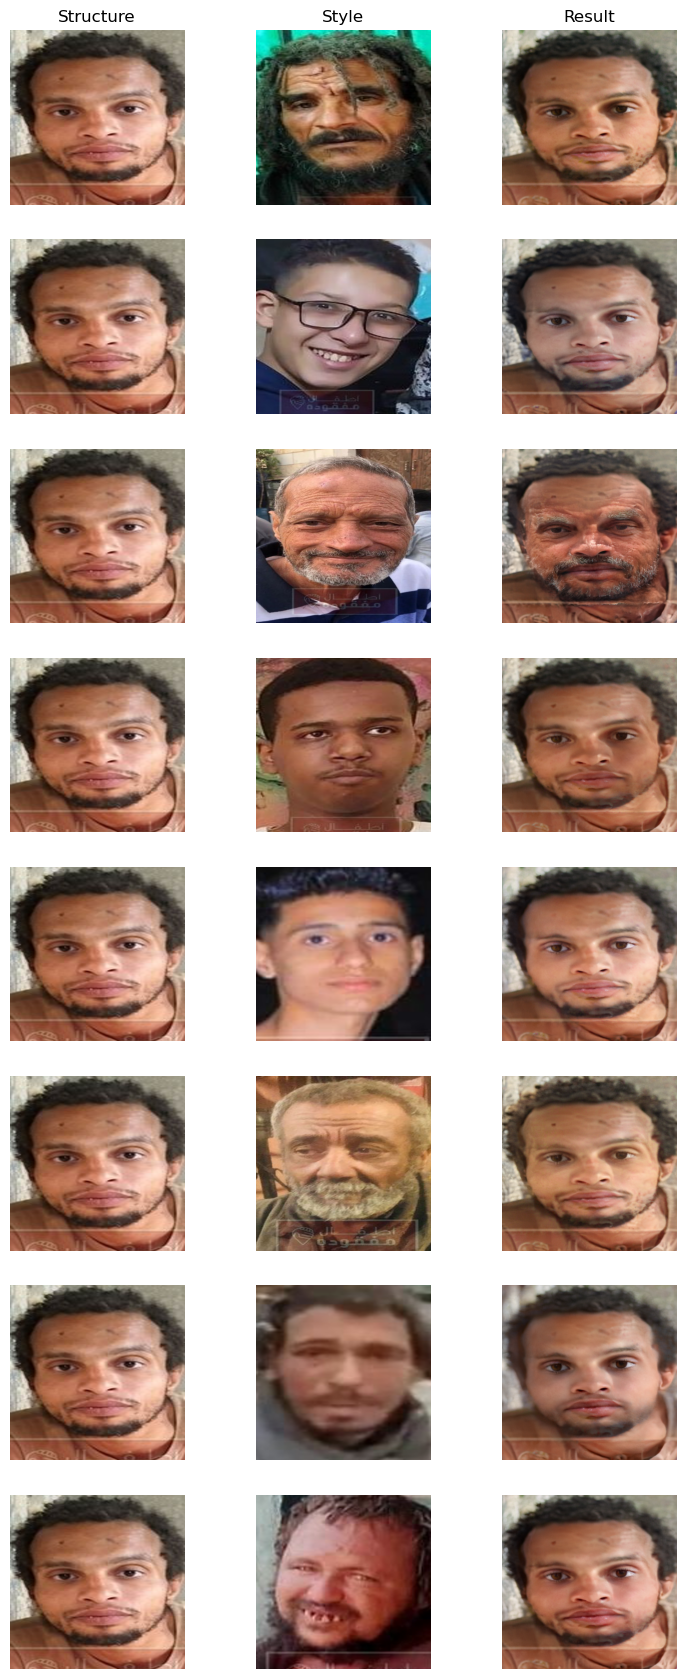

In [18]:
# import os
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image

structure = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/john_doe_image_781.png')

result1 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/john_doe_image_781_john_doe_image_754.png')
style1 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/john_doe_image_754.png')

result2 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/john_doe_image_781_reunited_image_762-checkpoint.png')
style2 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/reunited_image_762-checkpoint.png')

result3 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/john_doe_image_781_reunited_image_750-checkpoint.png')
style3 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/reunited_image_750-checkpoint.png')

result4 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/john_doe_image_781_reunited_image_714-checkpoint.png')
style4 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/reunited_image_714-checkpoint.png')

result5 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/john_doe_image_781_reunited_image_504-checkpoint.png')
style5 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/reunited_image_504-checkpoint.png')

result6 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/john_doe_image_781_john_doe_image_70-checkpoint.png')
style6 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/john_doe_image_70-checkpoint.png')

result7 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/john_doe_image_781_john_doe_image_250-checkpoint.png')
style7 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/john_doe_image_250-checkpoint.png')

result8 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/john_doe_image_781_john_doe_image_198-checkpoint.png')
style8 = Image.open('/projectnb/sparkgrp/ml-atfal-mafkoda-grp/swapping-autoencoder-pytorch/results/ffhq512_pretrained/structurestylegridgeneration/test_latest/images/john_doe_image_198-checkpoint.png')

plt.figure(figsize=(9, 24))
plt.tight_layout()

for i in range(8):
    
    plt.subplot(9, 3, 3*i + 1)  # 1 row, 3 columns, 1st subplot
    plt.imshow(structure)
    plt.axis('off')  # Hide the axis
    if i == 0:
        plt.title('Structure')

# Plot the second image
plt.subplot(9, 3, 2)  # 1 row, 3 columns, 2nd subplot
plt.imshow(style1)
plt.title('Style')
plt.axis('off')

# Plot the third image
plt.subplot(9, 3, 3)  # 1 row, 3 columns, 3rd subplot
plt.imshow(result1)
plt.title('Result')
plt.axis('off')

plt.subplot(9, 3, 5)  # 1 row, 3 columns, 3rd subplot
plt.imshow(style2)
plt.axis('off')

plt.subplot(9, 3, 6)  # 1 row, 3 columns, 3rd subplot
plt.imshow(result2)
plt.axis('off')

plt.subplot(9, 3, 8)  # 1 row, 3 columns, 3rd subplot
plt.imshow(style3)
plt.axis('off')

plt.subplot(9, 3, 9)  # 1 row, 3 columns, 3rd subplot
plt.imshow(result3)
plt.axis('off')

plt.subplot(9, 3, 11)  # 1 row, 3 columns, 3rd subplot
plt.imshow(style4)
plt.axis('off')

plt.subplot(9, 3, 12)  # 1 row, 3 columns, 3rd subplot
plt.imshow(result4)
plt.axis('off')

plt.subplot(9, 3, 14)  # 1 row, 3 columns, 3rd subplot
plt.imshow(style5)
plt.axis('off')

plt.subplot(9, 3, 15)  # 1 row, 3 columns, 3rd subplot
plt.imshow(result5)
plt.axis('off')

plt.subplot(9, 3, 17)  # 1 row, 3 columns, 3rd subplot
plt.imshow(style6)
plt.axis('off')

plt.subplot(9, 3, 18)  # 1 row, 3 columns, 3rd subplot
plt.imshow(result6)
plt.axis('off')

plt.subplot(9, 3, 20)  # 1 row, 3 columns, 3rd subplot
plt.imshow(style7)
plt.axis('off')

plt.subplot(9, 3, 21)  # 1 row, 3 columns, 3rd subplot
plt.imshow(result7)
plt.axis('off')

plt.subplot(9, 3, 23)  # 1 row, 3 columns, 3rd subplot
plt.imshow(style8)
plt.axis('off')

plt.subplot(9, 3, 24)  # 1 row, 3 columns, 3rd subplot
plt.imshow(result8)
plt.axis('off')
# Display the plot
plt.show()
